In [1]:
import sys
import os
sys.path.append(os.path.abspath('C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1'))

In [2]:
from eso import ESO

# Hyperparameters

In [3]:

##hyperparameters related to ESO

generations = 2
num_epochs_training = 10
population_size = 30
#Chromosome
stack= False
#Gene
num_genes=None
min_num_genes = 1
max_num_genes = 10
min_height = 1
band_height = None
max_height = 16
#fitness
lambda_metric=0.7
lamdba_size=0.3

#-------------------------

In [4]:
# all the hyperparameters by default

settings = {
    "algorithm": {"max_generations": generations},
    "genetic_operator": {
        "mutation_rate": 0.3,
        "crossover_rate": 0.6,
        "reproduction_rate": 0.1,
        "mutation_height_range": 5,
        "mutation_position_range": 20,
    },
    "selection_operator": {"tournament_size": 4},
    "data": {
        "force_recreate_dataset": False,
        "keep_in_memory": False,
        "species_folder": "c:/Users/loren/Documents/Postdoc/ESO_project/Data",
        "train_size": 0.6,
        "test_size": 0.2,
        "reshuffle": False,
        "positive_class": "gibbon",
        "negative_class": "no-gibbon",
    },
    "preprocessing": {
        "sample_rate": 9600,
        "lowpass_cutoff": 2000,
        "downsample_rate": 4800,
        "nyquist_rate": 2400,
        "segment_duration": 4,
        "nb_negative_class": 10,
        "file_type": "svl",
        "audio_extension": ".wav",
        "n_fft": 1024,
        "hop_length": 256,
        "n_mels": 128,
        "f_min": 0,
        "f_max": 2000,
    },
    "population": {"pop_size": population_size},
    "gene": {"min_position": 0, "max_position": -1, "min_height": min_height, "max_height": max_height, "band_height": band_height},
    "chromosome": {
        "num_genes": num_genes,
        "min_num_genes": min_num_genes,
        "max_num_genes": max_num_genes,
        "lambda_1": lambda_metric,
        "lambda_2": lamdba_size,
        "stack": stack,
    },
    "model": {
        "optimizer_name": "adam",
        "loss_function_name": "cross_entropy",
        "num_epochs": num_epochs_training,
        "batch_size": 64,
        "learning_rate": 0.001,
        "shuffle": True,
        "metric": "f1",
    },
    "cnn_architecture": {
        "conv_layers": 1,
        "conv_filters": 8,
        "dropout_rate": 0.5,
        "conv_kernel": 8,
        "max_pooling_size": 4,
        "fc_units": 32,
        "fc_layers": 2,
        "conv_padding": None,  #padding controls the amount of padding applied to the input. It can be either a string {‘valid’, ‘same’} or an int / a tuple of ints giving the amount of implicit padding applied on both sides.
    
    }
}

# Run ESO 

In [5]:
#Call the class eso 
e = ESO(
            settings=settings,
            log_level=10,
            results_path="C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/results/",
            log_path="C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/logs/",
            tensorboard_log_dir="C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/logs/tensorboard/",
        )

2025-08-28 15:23:05 Initializing ESO...
Config: Config(_input={'algorithm': {'max_generations': 2}, 'genetic_operator': {'mutation_rate': 0.3, 'crossover_rate': 0.6, 'reproduction_rate': 0.1, 'mutation_height_range': 5, 'mutation_position_range': 20}, 'selection_operator': {'tournament_size': 4}, 'data': {'force_recreate_dataset': False, 'keep_in_memory': False, 'species_folder': 'c:/Users/loren/Documents/Postdoc/ESO_project/Data', 'train_size': 0.6, 'test_size': 0.2, 'reshuffle': False, 'positive_class': 'gibbon', 'negative_class': 'no-gibbon'}, 'preprocessing': {'sample_rate': 9600, 'lowpass_cutoff': 2000, 'downsample_rate': 4800, 'nyquist_rate': 2400, 'segment_duration': 4, 'nb_negative_class': 10, 'file_type': 'svl', 'audio_extension': '.wav', 'n_fft': 1024, 'hop_length': 256, 'n_mels': 128, 'f_min': 0, 'f_max': 2000}, 'population': {'pop_size': 30}, 'gene': {'min_position': 0, 'max_position': -1, 'min_height': 1, 'max_height': 16, 'band_height': None}, 'chromosome': {'num_genes': 

In [7]:
import time
start=time.time()
best_chromosome = e.run()
execution_time=time.time()-start
print(execution_time)

Logging training to C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/logs/tensorboard/20250828-142632
Loaded Baseline results!
Image shape: 128
Minimum Input Shape To Model:[11, 11]
---------------------------
Minimum Image Height: 11
Minimum Number of Genes:1
Minimum Height of one Gene:1
Band Height: None
Images are stacked: False
Calculated Minimum Chromosome Image Shape: 16
---------------------------
Minimum Image shape check passed!
Optimizing...
Creating datasets for chromosomes...
Found already existing shuffled file names! Loading from memory..
The dataset already exists. Skipping...
Loading dataset to set image shape...
Dataset loaded from c:\Users\loren\Documents\Postdoc\ESO_project\Data\SavedData\unpreprocessed/train
The dataset already exists. Skipping...
The dataset already exists. Skipping...
Encoding: {'no-gibbon': array([1., 0.]), 'gibbon': array([0., 1.])}
Creating Population from scratch.
2025-08-28 14:26:35 Starting ESO...
---------- Epoch 0 / 2 ----------
Loading 

Error occurred: min_height 4 should be less than or equal to band_height 3. Retrying... (1/5)


CNN model state dict saved to C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/results/eso_chromosome_cnn_state.pth!
All-time best Chromosome from ESO saved to: C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/results/
Algorithm finished!
All-time best Chromosome:
Chromosome Info:
Number of Genes: 3
Validation F1: 0.9337497211688601
Trainable parameters: 20106
Fitness: 0.21687777003165037
Genes: Gene 1: (43, 4)
Gene 2: (60, 8)
Gene 3: (76, 6)


Now retraining for full epochs...
TRAINING BASELINE MODEL
Training baseline model...
Found already existing shuffled file names! Loading from memory..
The dataset already exists. Skipping...
Loading dataset to set image shape...
Dataset loaded from c:\Users\loren\Documents\Postdoc\ESO_project\Data\SavedData\preprocessed/train
The dataset already exists. Skipping...
The dataset already exists. Skipping...
Loading dataset...
Dataset loaded from c:\Users\loren\Documents\Postdoc\ESO_project\Data\SavedData\preprocessed/train
Loading dataset...
Da

556.2691261768341


# Evaluation

In [6]:
#Evaluate Eso using the test dataset created in a similar way 
# to the training/validation dataset based on the manual annotations

e.evaluate(test_type="simple", save_name="Simple")

Evaluate performance of the baseline model on the testing dataset
load the model ...
Data Loaded from: c:\Users\loren\Documents\Postdoc\ESO_project\Data\SavedData\preprocessed\test
Evaluating...
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1115
           1       1.00      0.99      1.00      1908

    accuracy                           1.00      3023
   macro avg       1.00      1.00      1.00      3023
weighted avg       1.00      1.00      1.00      3023

[[1115    0]
 [  11 1897]]
Evaluate performance of the model obtained with the best chromosome on the testing dataset
load the model ...
load the best chromosome ...
Data Loaded from: c:\Users\loren\Documents\Postdoc\ESO_project\Data\SavedData\unpreprocessed\test
Evaluating...
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1115
           1       0.98      0.89      0.93      1908

    accuracy                        

------------------
RESULTS
                  F1         CONFUSION      TIME  PARAMS Image Shape  \
baseline    0.997109    1115 0 11 1897  0.435910  132234   (128, 76)   
chromosome  0.932708  1088 27 217 1691  0.026086   20106   (18, 151)   

            Image Size  F1_improvement  TIME_improvement  PARAMS_improvement  \
baseline          9728             NaN               NaN                 NaN   
chromosome        2718       -0.064588         -0.940157           -0.847951   

            Image Size Improvement  
baseline                       NaN  
chromosome                 -0.7206  


,F1,CONFUSION,TIME,PARAMS,Image Shape,Image Size,F1_improvement,TIME_improvement,PARAMS_improvement,Image Size Improvement
baseline,0.997109,1115 0 11 1897,0.435910,132234,"(128, 76)",9728,NaN,NaN,NaN,NaN
chromosome,0.932708,1088 27 217 1691,0.026086,20106,"(18, 151)",2718,-0.064588,-0.940157,-0.847951,-0.7206


In [11]:
#Evaluate Eso on the entire files of the testing dataset (takes time)
# When force_calc_spectrograms=True, spectrograms will be re-generated each time the function is called
# and will not be saved for future use.

e.evaluate(test_type="entire", save_name="Entire_dataset", force_calc_spectrograms=True)

Evaluate performance of the baseline model on the testing dataset
load the model ...
Clean the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Predictions_baseline containing predictions
Clean the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Predictions_baseline containing predictions
Processing file: HGSM3AC_0+1_20150714_051300
Processing file: HGSM3AC_0+1_20150714_051300
Forcing recalculation of spectrograms to predict
Forcing recalculation of spectrograms to predict
Found file
Found file
Filtering...
Filtering...
Downsampling...
Downsampling...
Predicting...
Predicting...
Done
Done
Processing file: HGSM3AC_0+1_20150810_052200_2
Processing file: HGSM3AC_0+1_20150810_052200_2
Forcing recalculation of spectrograms to predict
Forcing recalculation of spectrograms to predict
Found file
Found file
Filtering...
Filtering...
Downsampling...
Downsampling...
Predicting...
Predicting...
Done
Done
Processing file: HGSM3C_0+1_20150810_052200_1
Processing file: HGSM3C_0+1_201

------------------
RESULTS
                  F1        CONFUSION        TIME  PARAMS Image Shape  \
baseline    0.914761   660 78 45 9262  150.757783  132234   (128, 76)   
chromosome  0.839432  562 72 143 9384  137.924133   20106   (18, 151)   

            Image Size  F1_improvement  TIME_improvement  PARAMS_improvement  \
baseline          9728             NaN               NaN                 NaN   
chromosome        2718       -0.082348         -0.085128           -0.847951   

            Image Size Improvement  
baseline                       NaN  
chromosome                 -0.7206  


,F1,CONFUSION,TIME,PARAMS,Image Shape,Image Size,F1_improvement,TIME_improvement,PARAMS_improvement,Image Size Improvement
baseline,0.914761,660 78 45 9262,150.757783,132234,"(128, 76)",9728,NaN,NaN,NaN,NaN
chromosome,0.839432,562 72 143 9384,137.924133,20106,"(18, 151)",2718,-0.082348,-0.085128,-0.847951,-0.7206


In [13]:
#Evaluate Eso on the entire files of the testing dataset 
# When force_calc_spectrograms=False, spectrograms generated from the full testing dataset 
# will be saved and reused the next time this function is called.


e.evaluate(test_type="entire", save_name="Entire_dataset", force_calc_spectrograms=False)

Evaluate performance of the baseline model on the testing dataset
load the model ...
Clean the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Predictions_baseline containing predictions
Clean the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Predictions_baseline containing predictions
Creating the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Saved_spectrograms_baseline to save spectrograms to predict
Creating the folder c:\Users\loren\Documents\Postdoc\ESO_project\Data\Saved_spectrograms_baseline to save spectrograms to predict
Processing file: HGSM3AC_0+1_20150714_051300
Processing file: HGSM3AC_0+1_20150714_051300
Found spectrograms to predict on disk:c:\Users\loren\Documents\Postdoc\ESO_project\Data\Saved_spectrograms_baseline\HGSM3AC_0+1_20150714_051300_spectrograms_to_predict_preprocessing_True.npy
Found spectrograms to predict on disk:c:\Users\loren\Documents\Postdoc\ESO_project\Data\Saved_spectrograms_baseline\HGSM3AC_0+1_20150714_051300_spectrog

------------------
RESULTS
                  F1        CONFUSION      TIME  PARAMS Image Shape  \
baseline    0.914761   660 78 45 9262  4.565997  132234   (128, 76)   
chromosome  0.839432  562 72 143 9384  4.355309   20106   (18, 151)   

            Image Size  F1_improvement  TIME_improvement  PARAMS_improvement  \
baseline          9728             NaN               NaN                 NaN   
chromosome        2718       -0.082348         -0.046143           -0.847951   

            Image Size Improvement  
baseline                       NaN  
chromosome                 -0.7206  


,F1,CONFUSION,TIME,PARAMS,Image Shape,Image Size,F1_improvement,TIME_improvement,PARAMS_improvement,Image Size Improvement
baseline,0.914761,660 78 45 9262,4.565997,132234,"(128, 76)",9728,NaN,NaN,NaN,NaN
chromosome,0.839432,562 72 143 9384,4.355309,20106,"(18, 151)",2718,-0.082348,-0.046143,-0.847951,-0.7206


# Visualisation of the spectrograms and the bands extracted by the best chromosome

In [14]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from eso.model.model import Model

In [16]:
#load the chromosome 
chromosome = np.load("C:/Users/loren/Documents/Postdoc/ESO_project/ESO-1/results/eso_chromosome.pkl", allow_pickle=True)
print(chromosome)

Chromosome Info:
Number of Genes: 3
Validation F1: 0.9337497211688601
Trainable parameters: 20106
Fitness: 0.21687777003165037
Genes: Gene 1: (43, 4)
Gene 2: (60, 8)
Gene 3: (76, 6)




In [17]:
# Load the preprocessed training dataset
X = np.load("C:/Users/loren/Documents/Postdoc/ESO_project/Data/SavedData/preprocessed/train/X.pkl", allow_pickle=True)
Y = np.load("C:/Users/loren/Documents/Postdoc/ESO_project/Data/SavedData/preprocessed/train/Y.pkl", allow_pickle=True)


In [18]:
# Load the unpreprocessed training dataset
X_un = np.load("C:/Users/loren/Documents/Postdoc/ESO_project/Data/SavedData/unpreprocessed/train/X.pkl", allow_pickle=True)
Y_un = np.load("C:/Users/loren/Documents/Postdoc/ESO_project/Data/SavedData/unpreprocessed/train/Y.pkl", allow_pickle=True)


In [19]:
#keep only the presence windows
X = X[Y[:, 1] == 1]
X_un = X_un[Y_un[:, 1] == 1]

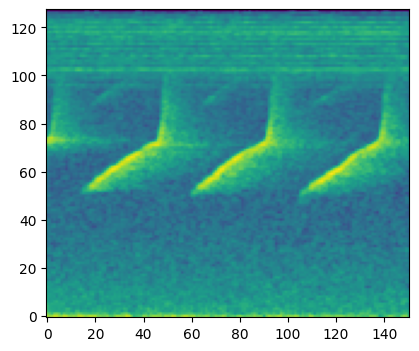

In [20]:

#plot the spectrogram without preprocessing (low-filtering and downsampling)
plt.figure(figsize=(8, 4))
plt.imshow(X_un[200])
plt.gca().invert_yaxis()
plt.show()

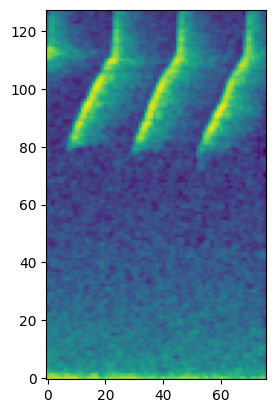

In [21]:
#plot the spectrogram with preprocessing
plt.imshow(X[200])
plt.gca().invert_yaxis()
plt.show()

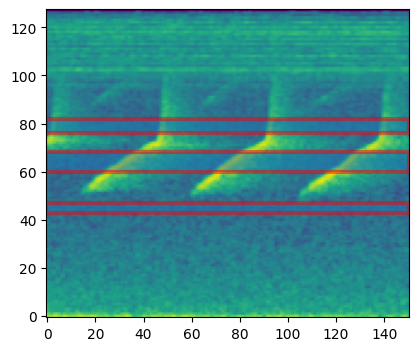

In [22]:
#plot the spectrogram without preprocessing with the bands extracted by the best Eso chromosome

%matplotlib inline
plt.figure(figsize=(8, 4))
plt.imshow(X_un[200], cmap="viridis")
#plt.axis('off')
genes = chromosome.get_genes()
color=color=["black","white", "magenta","cyan","blue", "red"]
for i in range(len(genes)): 
    gene_pos = genes[i].get_band_position()
    gene_height = genes[i].get_band_height()
    plt.axhspan(gene_pos, gene_pos+gene_height, edgecolor="red", linewidth=3,alpha=0.5)
    # invert y axis
plt.gca().invert_yaxis()
plt.show()